Generate 3 sine waves with frequencies 1 Hz, 4 Hz, and 7 Hz, amplitudes 3, 1 and 0.5, and phase all zeros. Add this 3 sine waves together with a sampling rate 100 Hz, you will see that it is the same signal we just shown at the beginning of the section.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

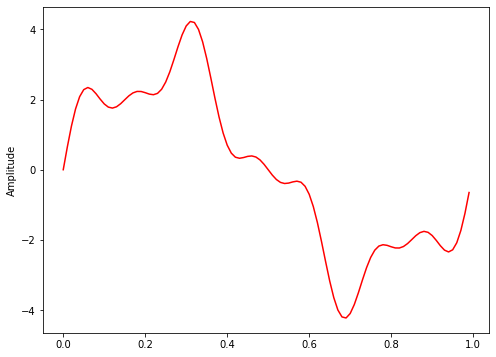

In [2]:
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

Write a function DFT(x) which takes in one argument, x - input 1 dimensional real-valued signal. The function will calculate the DFT of the signal and return the DFT values. Apply this function to the signal we generated above and plot the result.

<ipython-input-3-98a659ad04ea>:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(freq, abs(X), 'b', \


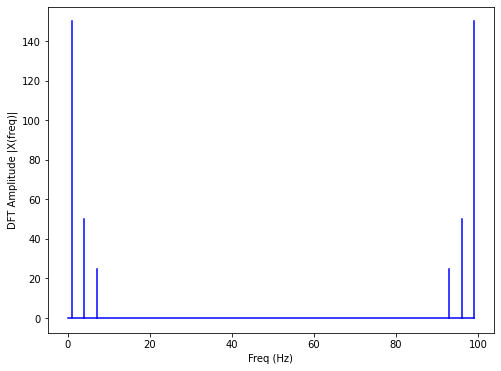

In [3]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

Plotting Nyquist Frequncies

<ipython-input-4-7d07e9712042>:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(f_oneside, abs(X_oneside), 'b', \
<ipython-input-4-7d07e9712042>:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(f_oneside, abs(X_oneside), 'b', \


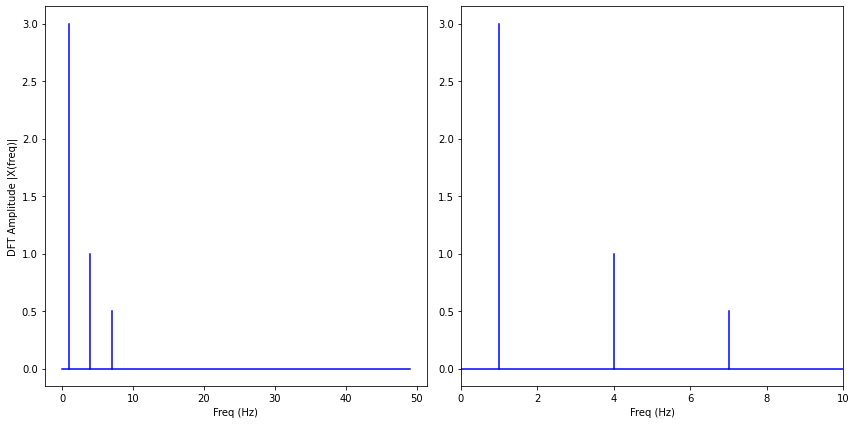

In [4]:
n_oneside = N//2
# get the one side frequency

f_oneside = freq[:n_oneside]


# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

Write a function to generate a simple signal with different sampling rate, and see the difference of computing time by varying the sampling rate.

In [5]:
def gen_sig(sr):
    '''
    function to generate
    a simple 1D signal with
    different sampling rate
    '''
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    freq = 1.
    x = 3*np.sin(2*np.pi*freq*t)
    return x

In [6]:
# sampling rate =2000
sr = 2000
%timeit DFT(gen_sig(sr))

438 ms ± 45.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
# sampling rate 3000
sr = 3000
%timeit DFT(gen_sig(sr))

560 ms ± 20.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
